In [1]:
import pandas as pd
#dataUpload
df=pd.read_csv(r"C:\Users\Admin\Desktop\skin cancer detection\data\HAM10000_metadata.csv",sep=',')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [2]:
df.shape

(10015, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Missing Values Finding

In [4]:
df.isna()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10010,False,False,False,False,False,False,False
10011,False,False,False,False,False,False,False
10012,False,False,False,False,False,False,False
10013,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Missing values drop

In [6]:
df.dropna(subset=['age'], inplace=True)

In [7]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [8]:
label_mapping = {'nv': 0, 'mel': 1, 'bkl': 0, 'bcc': 1, 'akiec': 1, 'vas': 0, 'df': 0}
df['cancer'] = df['dx'].map(label_mapping)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cancer
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0.0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0.0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0.0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0.0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0.0


In [9]:
#import labelencoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["dx"]=le.fit_transform(df["dx"])
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cancer
0,HAM_0000118,ISIC_0027419,2,histo,80.0,male,scalp,0.0
1,HAM_0000118,ISIC_0025030,2,histo,80.0,male,scalp,0.0
2,HAM_0002730,ISIC_0026769,2,histo,80.0,male,scalp,0.0
3,HAM_0002730,ISIC_0025661,2,histo,80.0,male,scalp,0.0
4,HAM_0001466,ISIC_0031633,2,histo,75.0,male,ear,0.0


In [10]:
# Drop specified columns
columns_to_drop = ['image_id', 'lesion_id', 'dx_type']
df = df.drop(columns=columns_to_drop)

In [11]:
le=preprocessing.LabelEncoder()
df["age"]=le.fit_transform(df["age"])
le=preprocessing.LabelEncoder()
df["cancer"]=le.fit_transform(df["cancer"])
le=preprocessing.LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
le=preprocessing.LabelEncoder()
df["localization"]=le.fit_transform(df["localization"])
df.head()

,dx,age,sex,localization,cancer
0,2,16,1,11,0
1,2,16,1,11,0
2,2,16,1,11,0
3,2,16,1,11,0
4,2,15,1,4,0


In [12]:
x=df.iloc[:,0:4]
y=df['cancer']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)
x_train

,dx,age,sex,localization
8225,5,14,1,2
3015,5,10,1,12
6135,5,10,0,12
1268,4,9,1,9
6722,5,8,1,14
...,...,...,...,...
1303,4,10,1,2
4035,5,16,1,12
7271,5,11,0,3
5212,5,10,0,0


In [14]:
y_train

8225    0
3015    0
6135    0
1268    1
6722    0
       ..
1303    1
4035    0
7271    0
5212    0
3787    0
Name: cancer, Length: 7966, dtype: int64

# KNN Algorithm

In [15]:
#KNNalgorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#prediction
pred=knn.predict(x_test)
#accuracy
from sklearn.metrics import accuracy_score
ac_kn=accuracy_score(y_test, pred)
print("Accuracy=",ac_kn)

#confusionmatrix
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,pred)
print(c_m)

#classificationreport
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Accuracy= 0.9894578313253012
[[1567    4    0]
 [   6  389    0]
 [  11    0   15]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1571
           1       0.99      0.98      0.99       395
           2       1.00      0.58      0.73        26

    accuracy                           0.99      1992
   macro avg       0.99      0.85      0.90      1992
weighted avg       0.99      0.99      0.99      1992



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(x_train, y_train).predict(x_test)
#accuracy
from sklearn.metrics import accuracy_score
ac_nb=accuracy_score(y_test, pred)
print("Accuracy=",ac_nb)

#confusionmatrix
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,pred)
print(c_m)

#classificationreport
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Accuracy= 0.786144578313253
[[1366  205    0]
 [ 221  174    0]
 [   0    0   26]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1571
           1       0.46      0.44      0.45       395
           2       1.00      1.00      1.00        26

    accuracy                           0.79      1992
   macro avg       0.77      0.77      0.77      1992
weighted avg       0.78      0.79      0.78      1992



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
#prediction
pred=rf.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
#accuracy
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test, pred)
print("Accuracy=",ac_rf)

#confusionmatrix
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,pred)
print(c_m)

# classificationreport
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Accuracy= 0.963855421686747
[[1571    0    0]
 [  46  349    0]
 [  26    0    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1571
           1       1.00      0.88      0.94       395
           2       0.00      0.00      0.00        26

    accuracy                           0.96      1992
   macro avg       0.65      0.63      0.64      1992
weighted avg       0.95      0.96      0.96      1992



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(criterion='entropy',max_depth=7)
ds.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [32]:
#prediction
pred=ds.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
#accuracy
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test, pred)
print("Accuracy=",ac_dt)

#confusionmatrix
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,pred)
print(c_m)

#classificationreport
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Accuracy= 1.0
[[1571    0    0]
 [   0  395    0]
 [   0    0   26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1571
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00        26

    accuracy                           1.00      1992
   macro avg       1.00      1.00      1.00      1992
weighted avg       1.00      1.00      1.00      1992



# SVM 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the performance of the model
ac_sv=accuracy_score(y_test, y_pred)
ac_sv

0.7781124497991968

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86      1571\n           1       0.44      0.44      0.44       395\n           2       1.00      1.00      1.00        26\n\n    accuracy                           0.78      1992\n   macro avg       0.77      0.77      0.77      1992\nweighted avg       0.78      0.78      0.78      1992\n'

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the logistic regression model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
ac_lr=accuracy_score(y_test, y_pred)
ac_lr

0.8237951807228916

In [37]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.92      0.89      1571\n           1       0.57      0.43      0.49       395\n           2       1.00      1.00      1.00        26\n\n    accuracy                           0.82      1992\n   macro avg       0.81      0.78      0.79      1992\nweighted avg       0.81      0.82      0.81      1992\n'

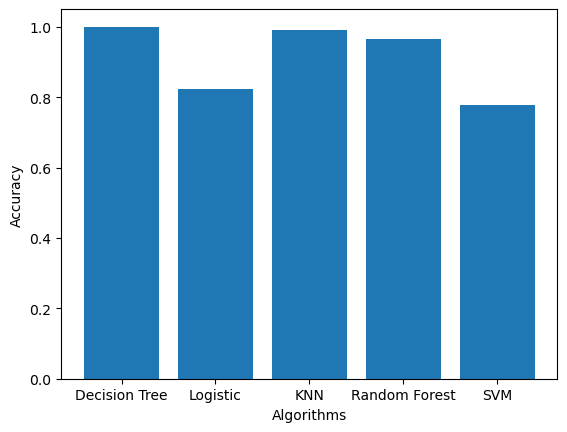

In [38]:
import matplotlib.pyplot as plt
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_kn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()